In [136]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import time

### Iniciando o ambiente para a leitura do vídeo

In [137]:
# Create a VideoCapture object and read from input file 
cap = cv2.VideoCapture('SMWorld.mp4') 
background_subtractor = cv2.createBackgroundSubtractorMOG2()

# Check if camera opened successfully 
if (cap.isOpened()== False): 
    print("Error opening video file") 

### Lendo o vídeo e armazenando cada frame na lista 'frames'

In [138]:
frames = []
# Read until video is completed 
while True: 
    ret, frame = cap.read() 
    if not ret: 
        print("Erro recebendo frame")
        break 

    #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    frames.append(frame)
    
    #cv2.imshow("Frame", foreground)

    if cv2.waitKey(1) == ord('q'): 
        break

cv2.destroyAllWindows()
cap.release()

In [ ]:
#transformando a lista frames em um objeto NumPy 
#numpy.ndarray tem métodos e atributos interessantes como shape, produto interno e etc
frames = np.array(frames)

### Iniciando procesasmento

In [23]:
#Funcção para imprimir imagens lado a lado (apenas para facilitar)
def plot2(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize = (10, 30)); 

    ax[0].imshow(img1) 
    ax[0].axis('off')
    ax[1].imshow(img2)
    ax[1].axis('off')

    plt.show()

In [24]:
#frame1 = cv2.cvtColor(frames[430], cv2.COLOR_BGR2HSV)
#frame2 = cv2.cvtColor(frames[490], cv2.COLOR_BGR2HSV)

frame1 = frames[430]
frame2 = frames[490]

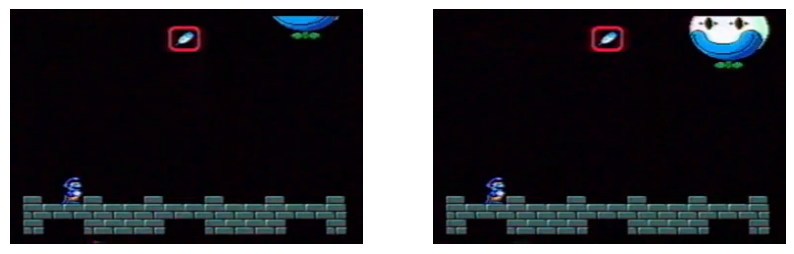

In [25]:
plot2(frame1, frame2)

### Usando a diferença de Frames
$Foreground = | I_t - I_{t-1} | > T$

In [26]:
abs_diff = cv2.absdiff(frame2, frame1)

plt.imshow(abs_diff)
plt.show()


In [27]:
def difFrames(frames): 
    n = frames.shape[0];
    print(n) 
    dif = []
    for i in range(n-1, 0, -1):
        #print(i, i-1)
        dif.append(cv2.absdiff(frames[i], frames[i-1]))

    return np.array(dif)

In [28]:
dif = difFrames(frames)

5840


#### Visualizando o vídeo sem o background

In [29]:
for frame in dif:
    cv2.imshow('Video Playback', frame)
    if cv2.waitKey(25) & 0xFF == 27:  # Press Esc key to exit
        break
    time.sleep(1 / 30)

cv2.destroyAllWindows()

### Usando a mediana para subtrair o fundo 
$Foreground_t = |I_t - B | > T $, onde $B = median(I_1, I_2, ... , I_k)$

In [33]:
background_frames = frames[-60:]
median_frame = np.median(background_frames, axis=0).astype(np.uint8)

frame_t = frames[-1]

# Compute the absolute difference between Frame_t and the median frame
abs_diff = cv2.absdiff(frame_t, median_frame)

plt.imshow(abs_diff)
plt.show()

In [38]:
def difFramesMedian(frames, k, threshold=30):
    newFrames = [] 
    background_frames = frames[-k:]
    median_frame = np.median(background_frames, axis = 0).astype(np.uint8)


    for i, frame in enumerate(frames):
        abs_diff = cv2.absdiff(frame, median_frame)

        abs_diff = cv2.cvtColor(abs_diff, cv2.COLOR_BGR2GRAY)

        _, foreground_mask = cv2.threshold(abs_diff, threshold, 255, cv2.THRESH_BINARY)

        newFrames.append(foreground_mask)

    return np.array(newFrames)

In [45]:
difMedian = difFramesMedian(frames, 60, 150)

In [46]:
for frame in difMedian:
    cv2.imshow('Video Playback', frame)
    if cv2.waitKey(25) & 0xFF == 27:  # Press Esc key to exit
        break
    time.sleep(1 / 30)

cv2.destroyAllWindows()

### Tracking do Mário usando correlação no vídeo sem fundo

In [123]:
mario = frames[501, 170:200, 50:80, :]
mario = cv2.cvtColor(mario, cv2.COLOR_BGR2GRAY)
label = cv2.cvtColor(frames[501], cv2.COLOR_BGR2GRAY)

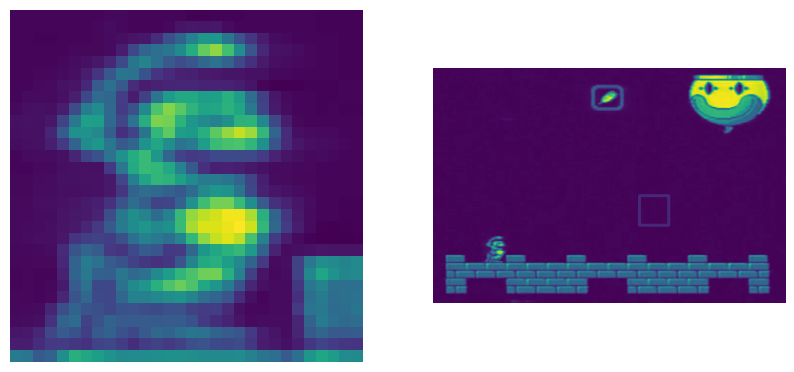

In [125]:
plot2(mario, label)

In [127]:
matching = cv2.matchTemplate(label, mario, cv2.TM_CCORR)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matching)

In [129]:
w, h  = mario.shape
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

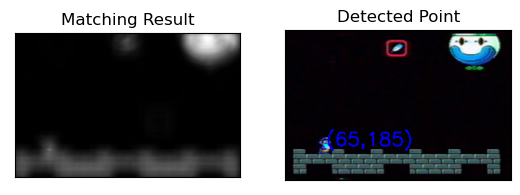

In [130]:
cv2.rectangle(frames[5001], top_left, bottom_right, 255, 2);

plt.subplot(121), plt.imshow(matching, cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(frames[500], cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()

In [134]:
def calcCorrelation(template, frames):
    w, h  = mario.shape
    for frame in frames: 
        matching = cv2.matchTemplate(frame, template, cv2.TM_CCORR)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(matching)

        top_left = min_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(frames[5001], top_left, bottom_right, 255, 2);

        plt.subplot(121), plt.imshow(matching, cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(frames[500], cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

        plt.show()

In [133]:
frames = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames]

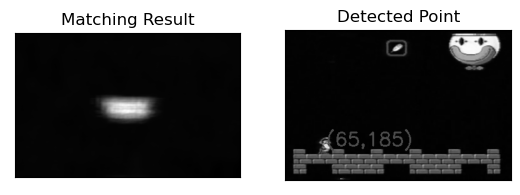

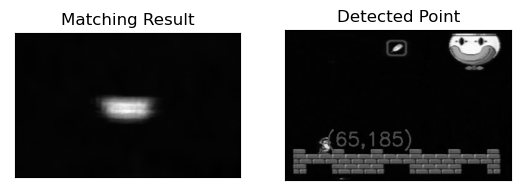

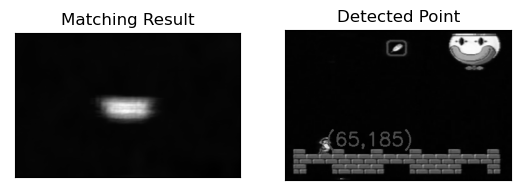

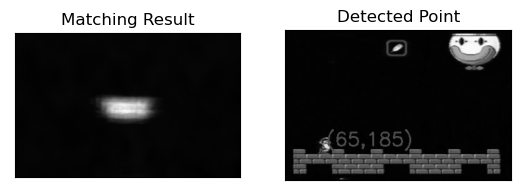

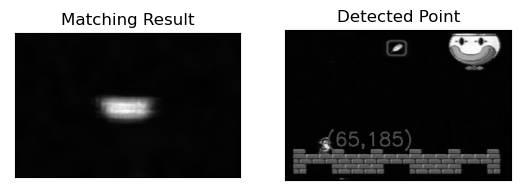

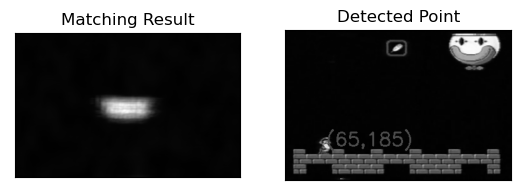

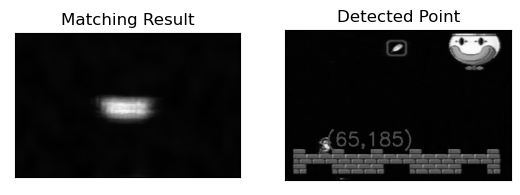

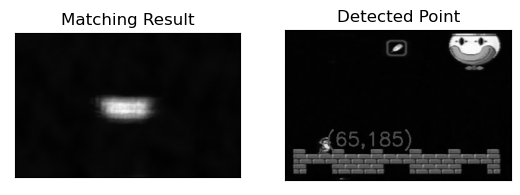

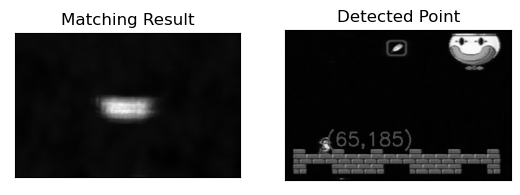

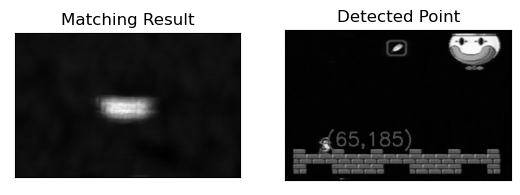

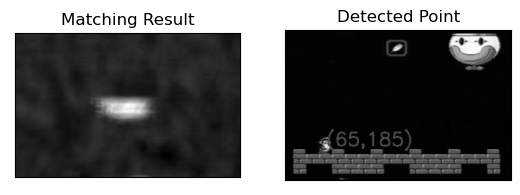

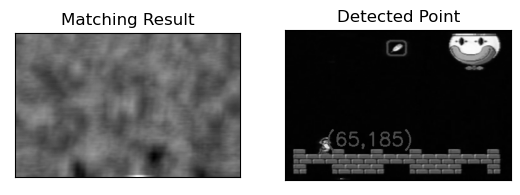

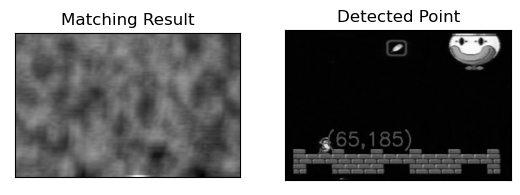

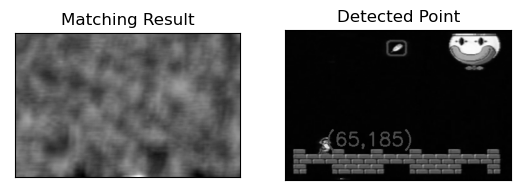

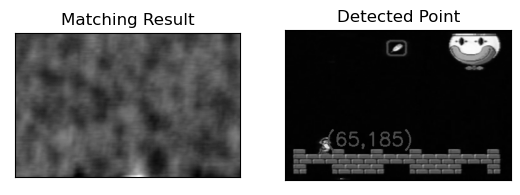

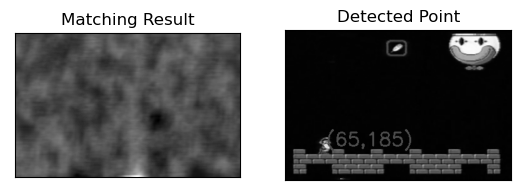

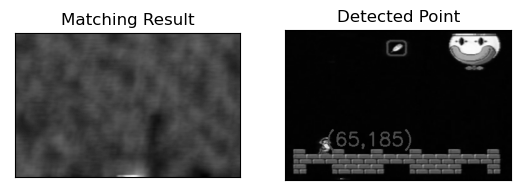

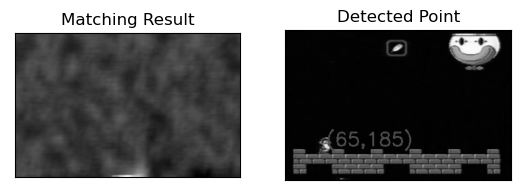

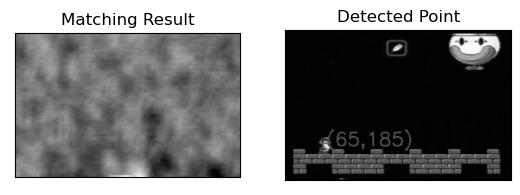

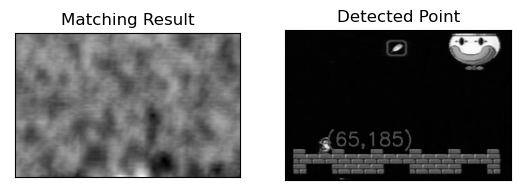

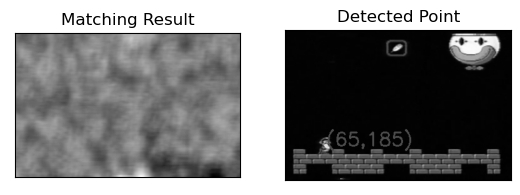

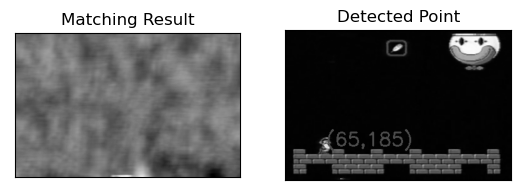

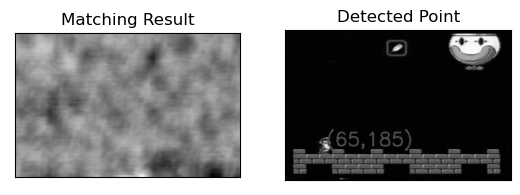

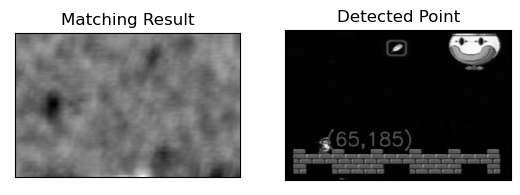

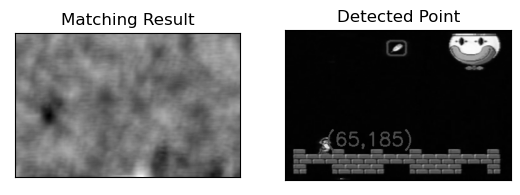

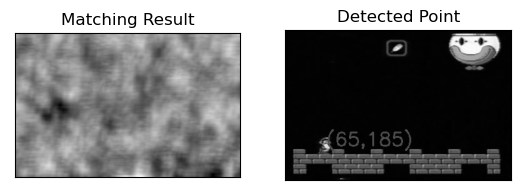

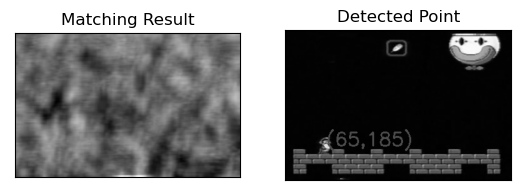

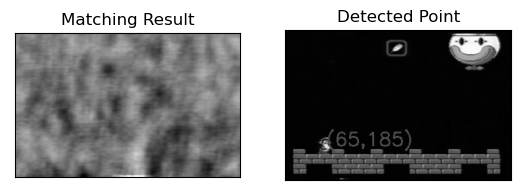

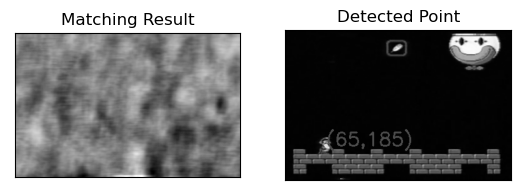

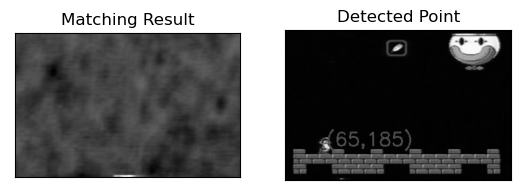

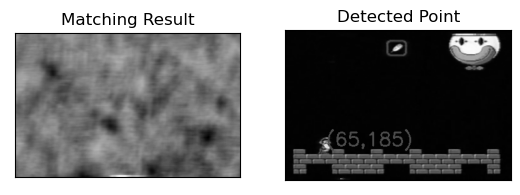

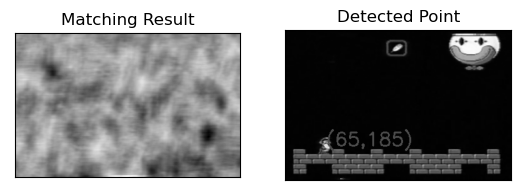

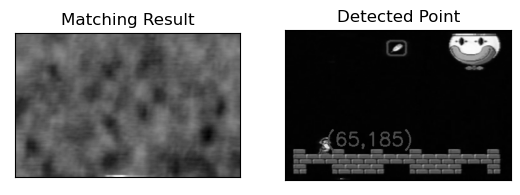

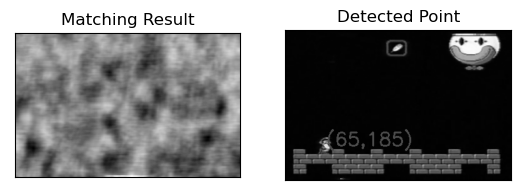

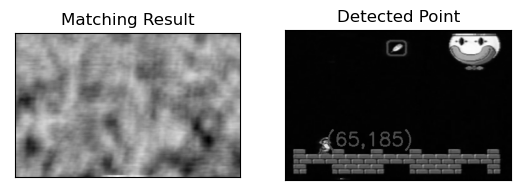

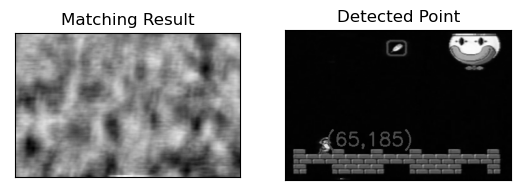

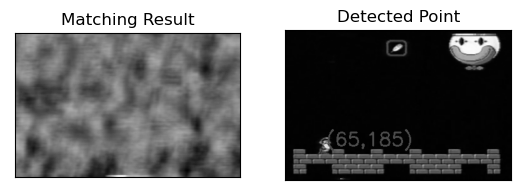

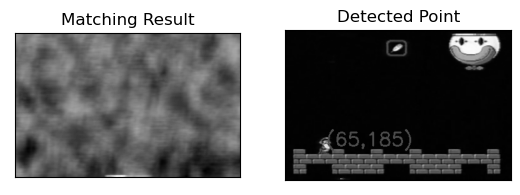

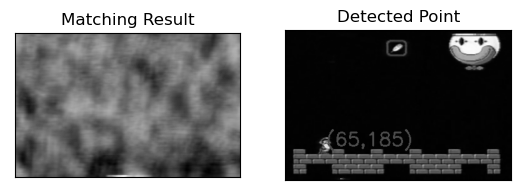

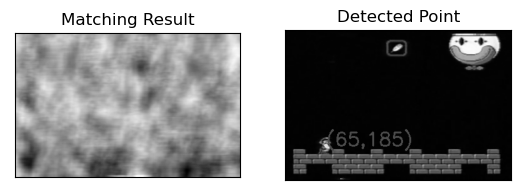

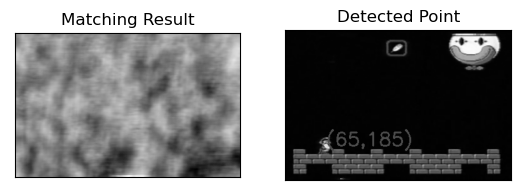

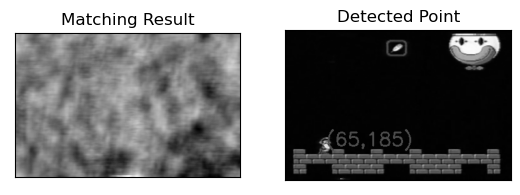

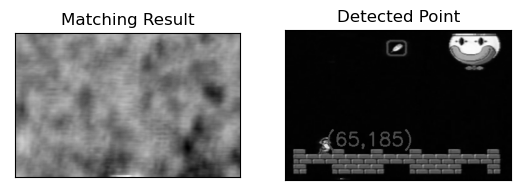

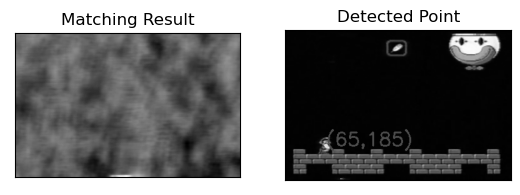

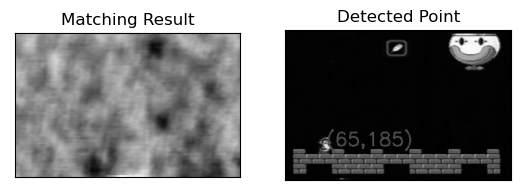

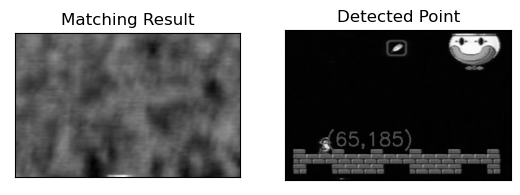

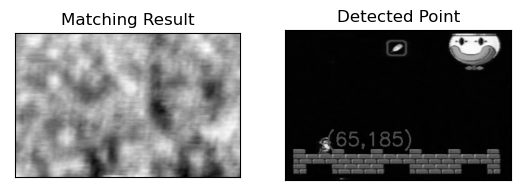

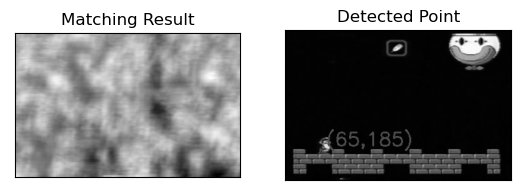

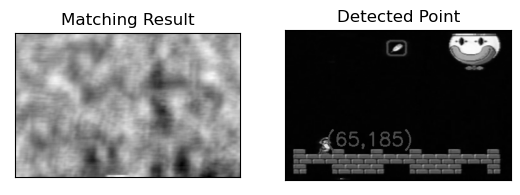

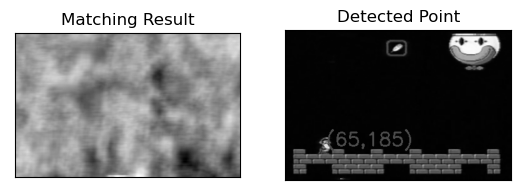

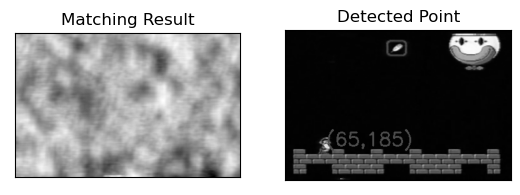

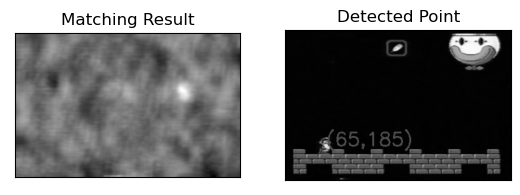

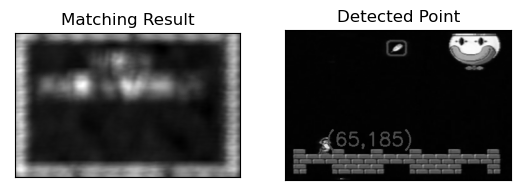

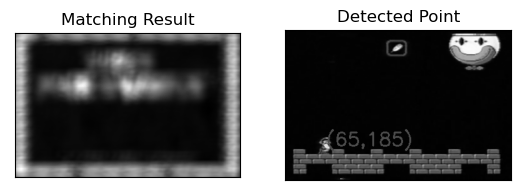

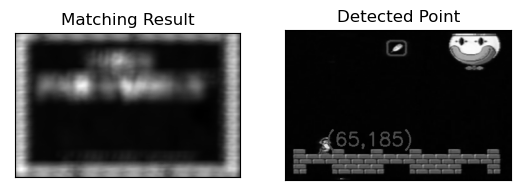

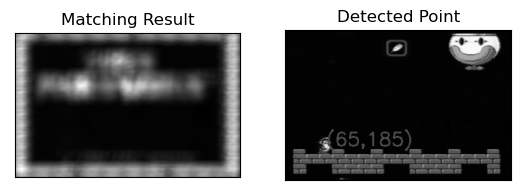

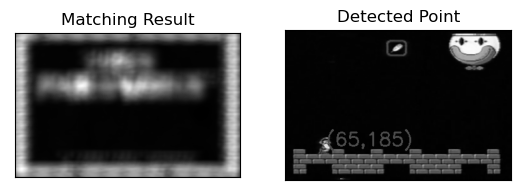

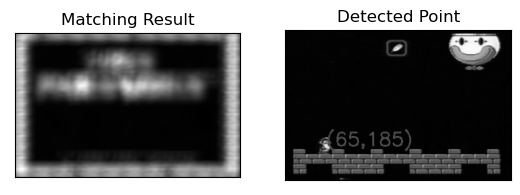

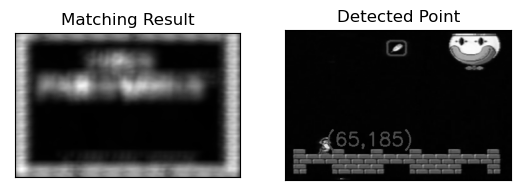

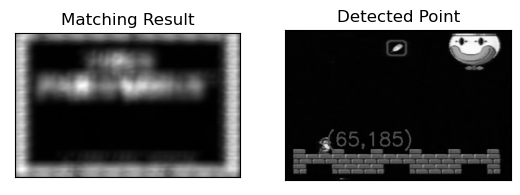

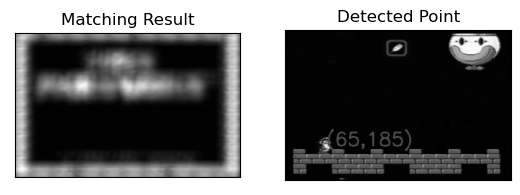

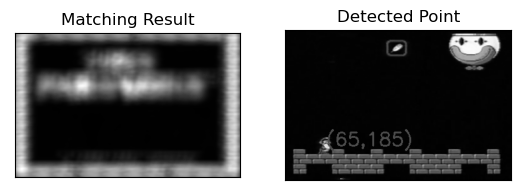

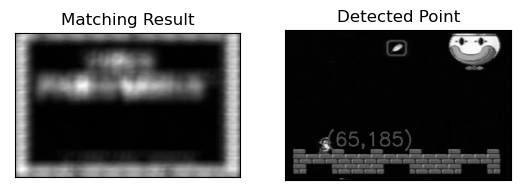

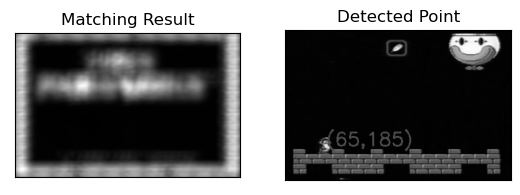

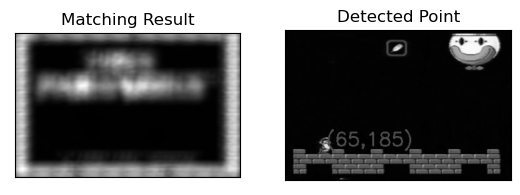

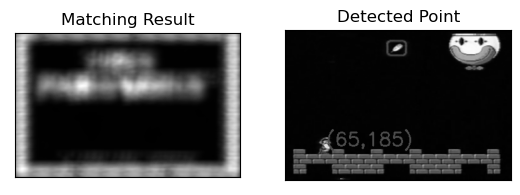

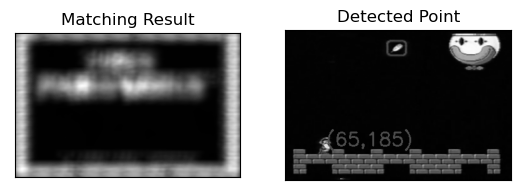

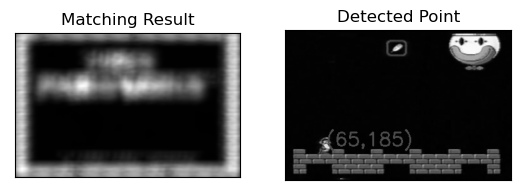

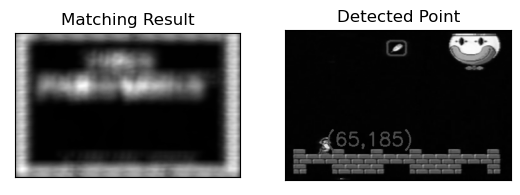

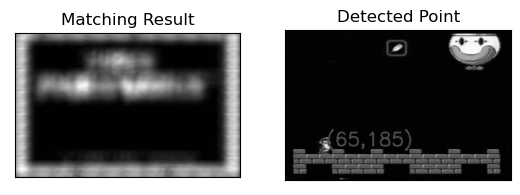

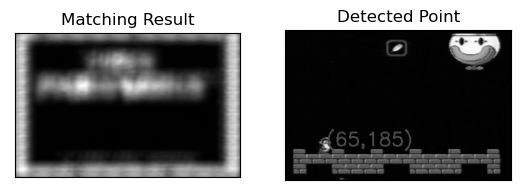

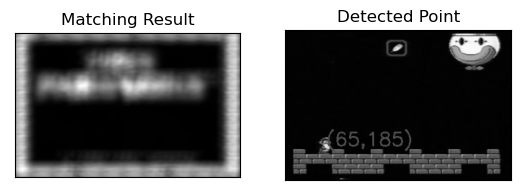

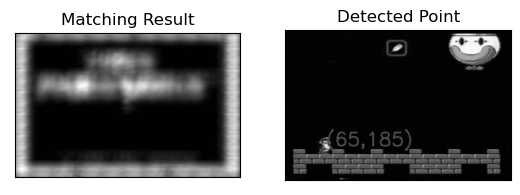

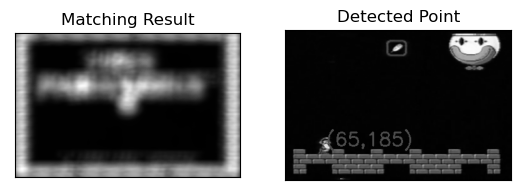

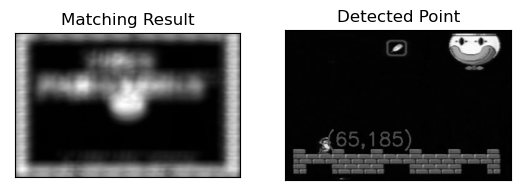

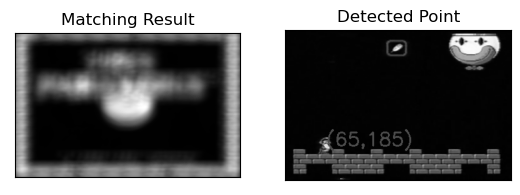

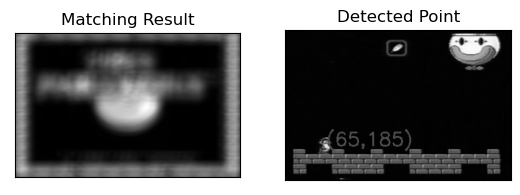

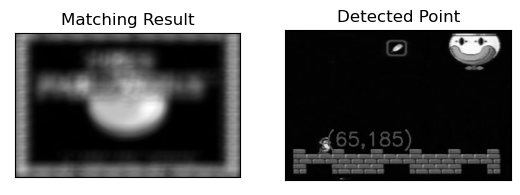

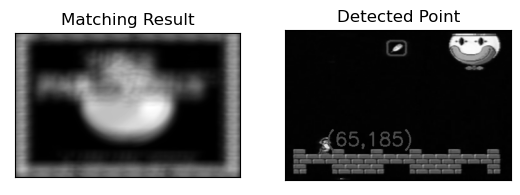

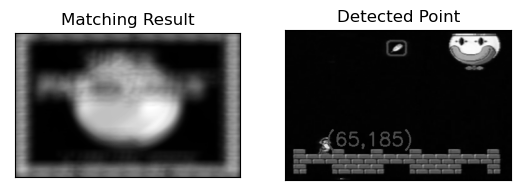

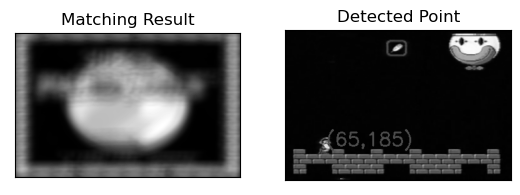

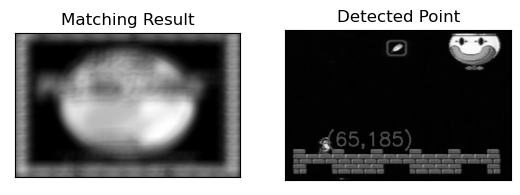

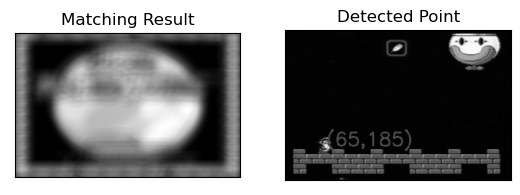

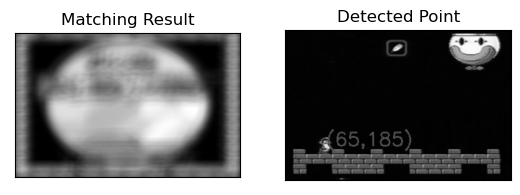

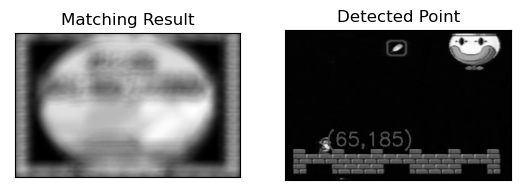

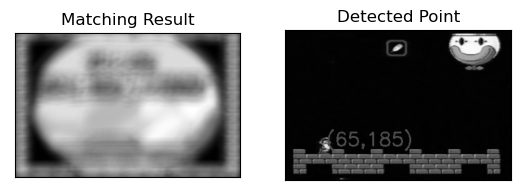

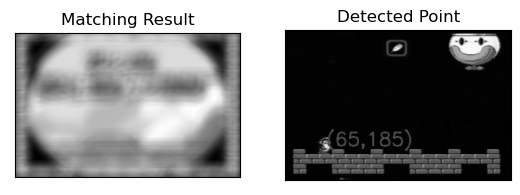

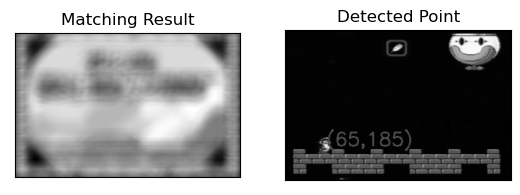

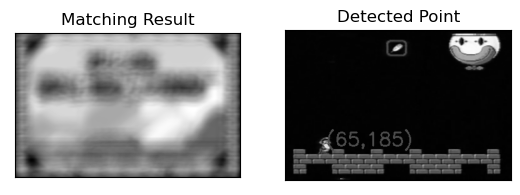

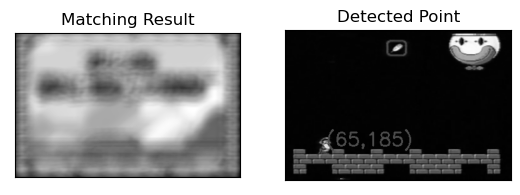

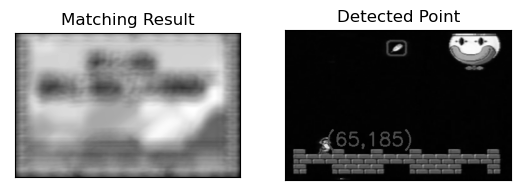

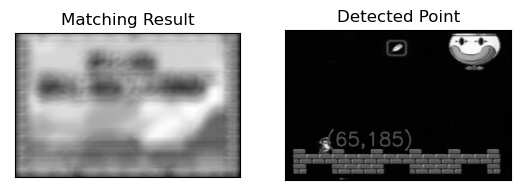

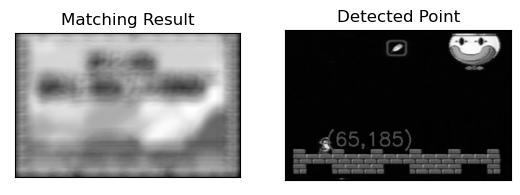

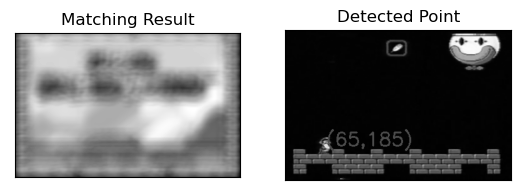

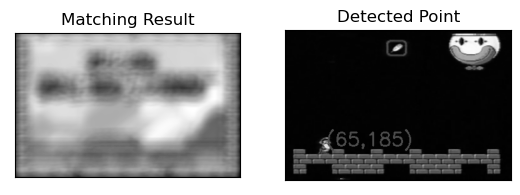

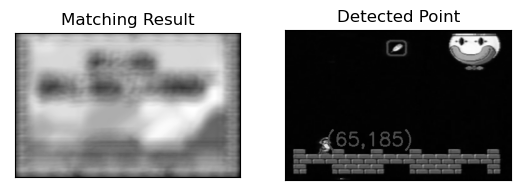

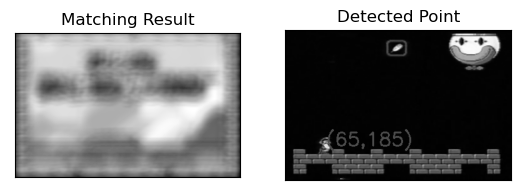

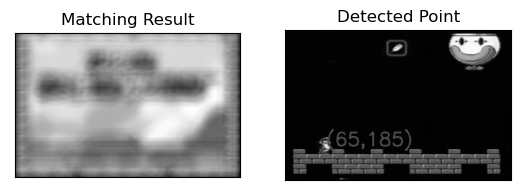

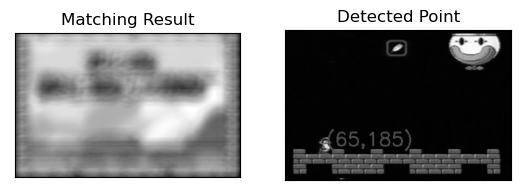

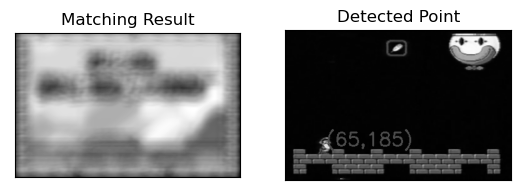

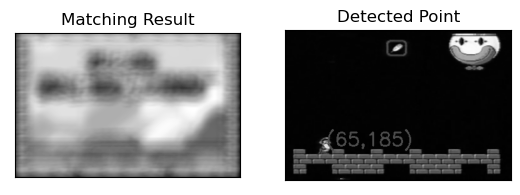

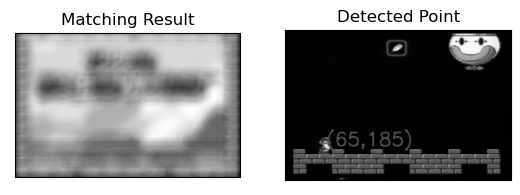

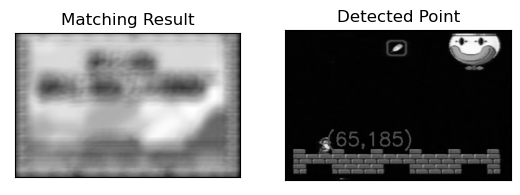

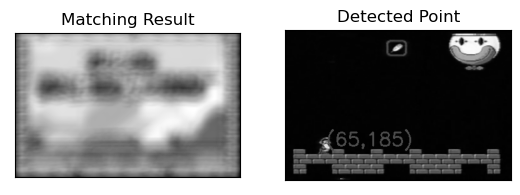

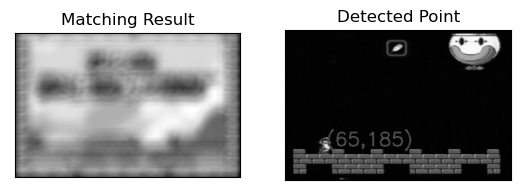

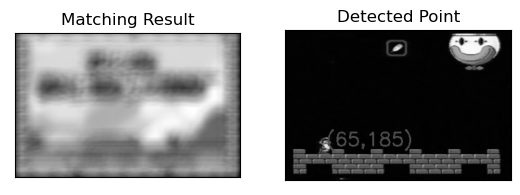

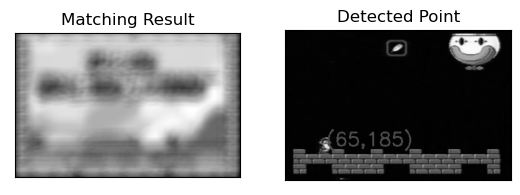

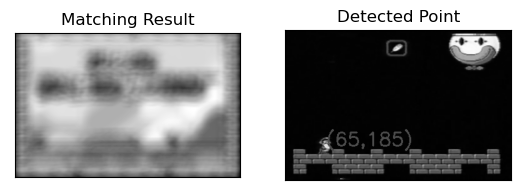

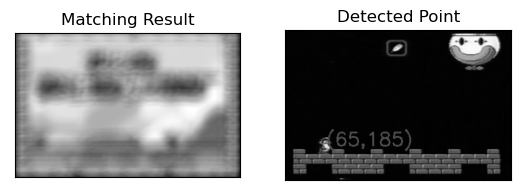

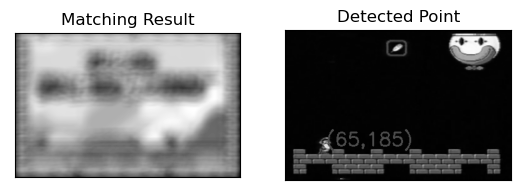

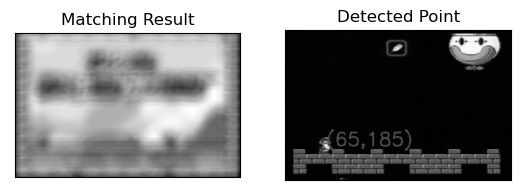

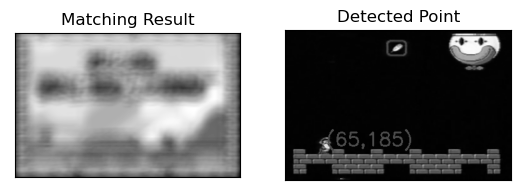

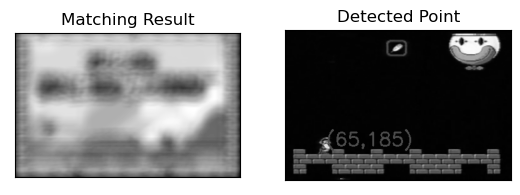

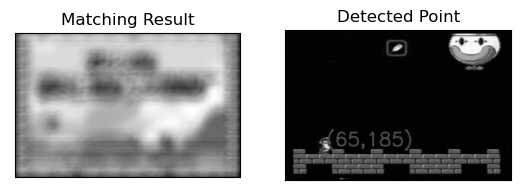

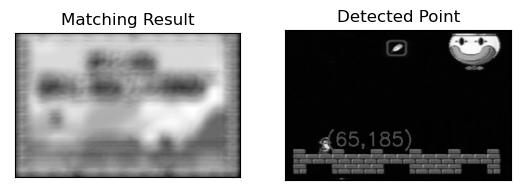

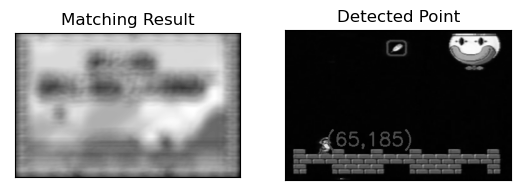

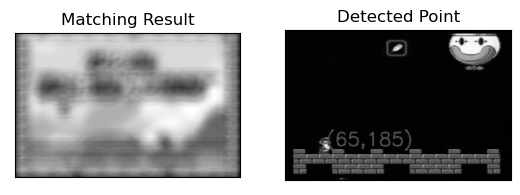

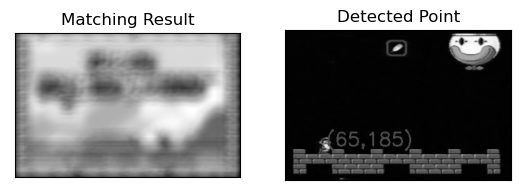

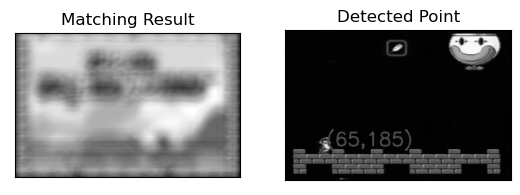

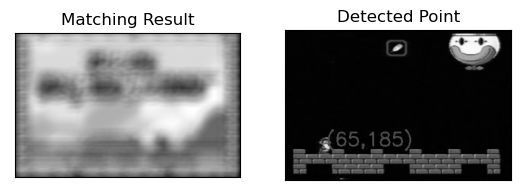

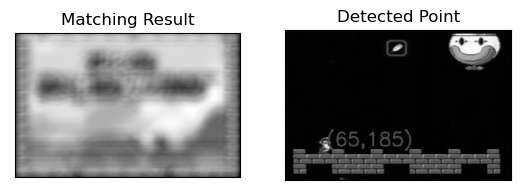

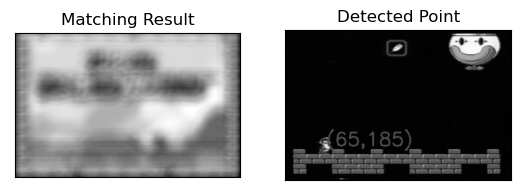

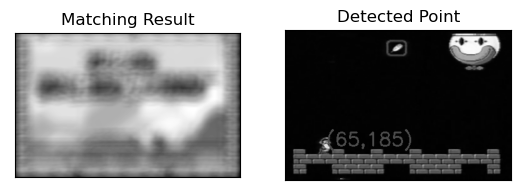

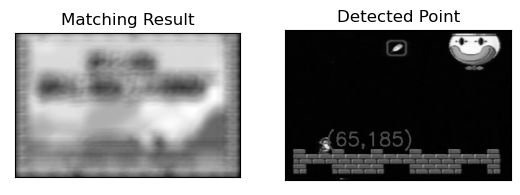

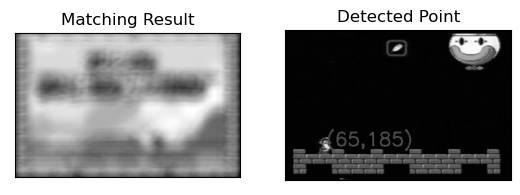

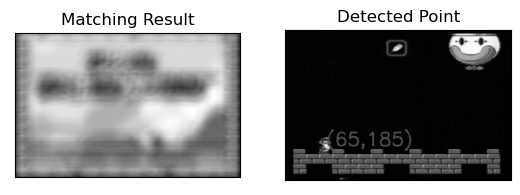

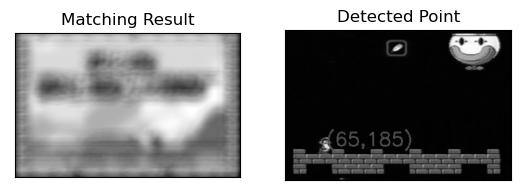

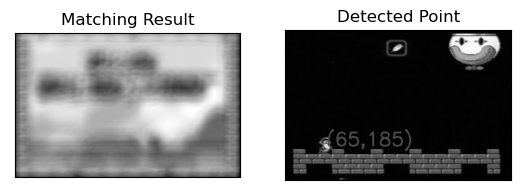

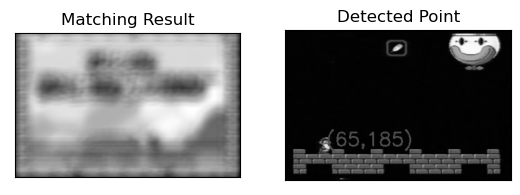

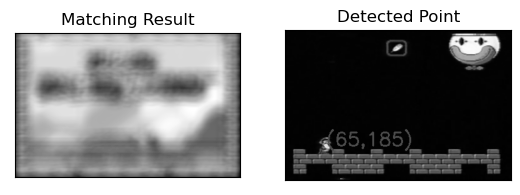

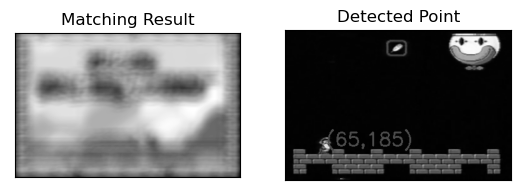

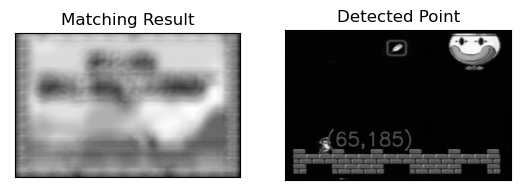

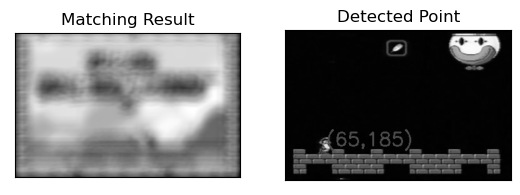

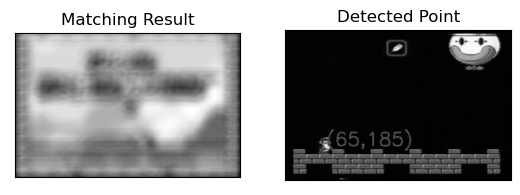

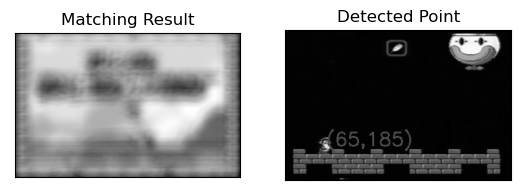

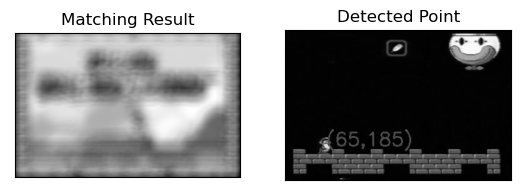

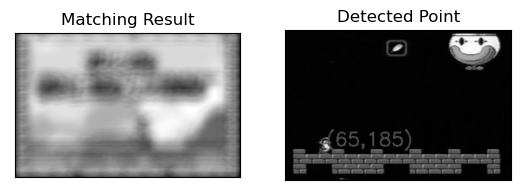

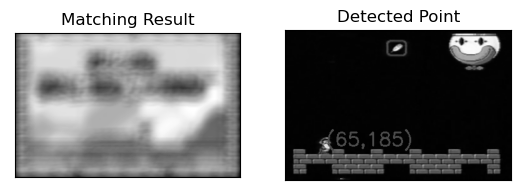

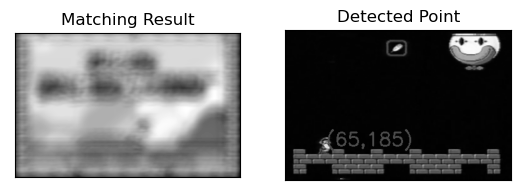

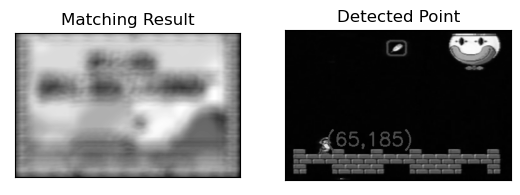

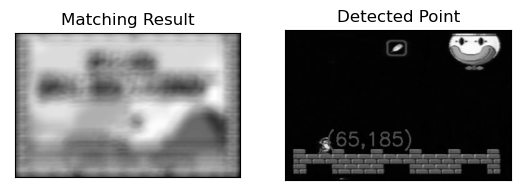

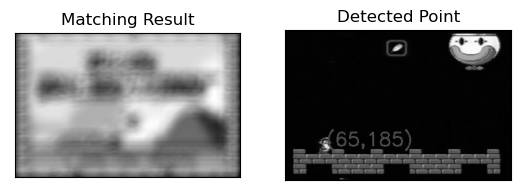

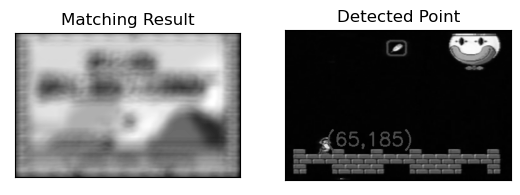

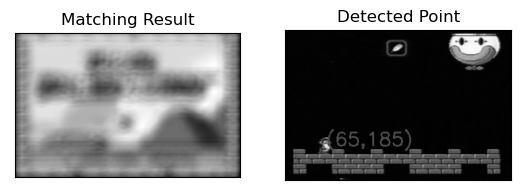

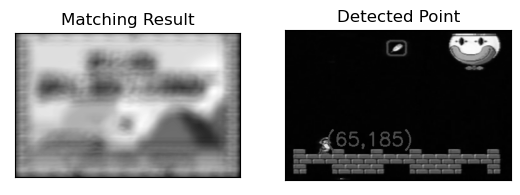

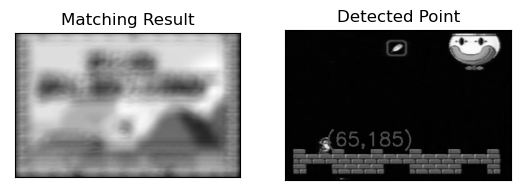

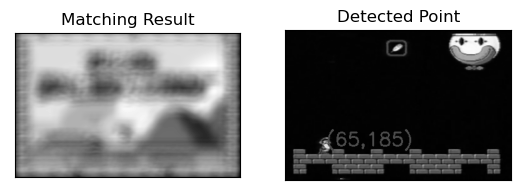

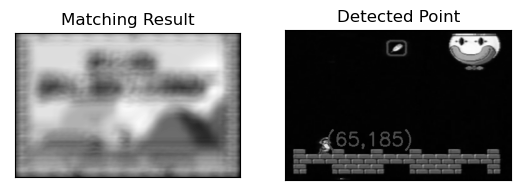

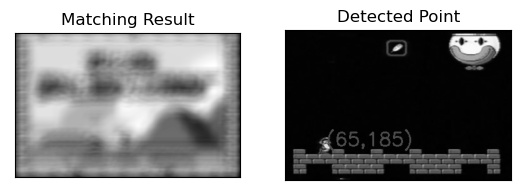

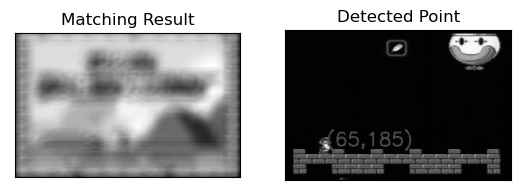

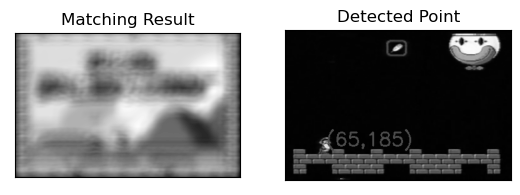

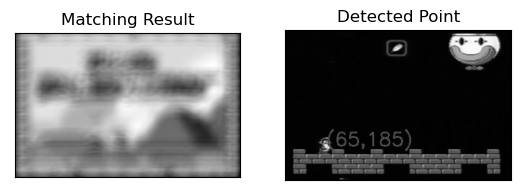

KeyboardInterrupt: 

In [135]:
calcCorrelation(mario, frames)